##**Non Graded Challenge 12**

By : Muhammad Rizki Herfian

Materi : Inferential Statistics

##**Problems :**
Dengan menggunakan data covid_19_indonesia_time_series_all.csv maka tentukanlah :
*   Lakukan hypothesis testing terhadap dataset diatas.
*   Ambil kesimpulan dari hasil analisa.


Pertama import library yang dibutuhkan, disini ada 4 library yang akan digunakan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Karena data yang digunakan sama seperti data project sebelumnnya (Non Graded 11) maka data yang sudah bersihkan sebelumnya akan digunakan kembali ke dalam project pengerjaan project ini.

In [2]:
data = pd.read_csv('CovidClean.csv')

In [3]:
data.head(15)

,Unnamed: 0,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Biasa,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,0.0,0.00
1,1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Biasa,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.0,0.33
2,2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Biasa,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.0,1.00
3,3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Biasa,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.0,3.00
4,4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Biasa,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.0,1.00
5,5,1/13/2020,ID-JI,Jawa Timur,0,0,0,0,9,13,56,-60,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Biasa,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.00,0.32,144.44%,622.22%,1.0,0.00
6,6,1/14/2020,ID-JI,Jawa Timur,0,0,0,0,9,13,56,-60,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Biasa,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.00,0.32,144.44%,622.22%,1.0,1.00
7,7,1/15/2020,ID-JI,Jawa Timur,0,0,0,0,9,13,56,-60,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Biasa,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.00,0.32,144.44%,622.22%,1.0,1.00
8,8,1/16/2020,ID-JI,Jawa Timur,0,0,0,0,9,13,56,-60,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Biasa,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.00,0.32,144.44%,622.22%,1.0,1.00
9,9,1/17/2020,ID-JI,Jawa Timur,0,0,4,-4,9,13,60,-64,Province,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,Daerah Biasa,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.00,0.32,144.44%,666.67%,1.0,1.00


In [4]:
data.shape

(16283, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   16283 non-null  int64  
 1   Date                         16283 non-null  object 
 2   Location ISO Code            16283 non-null  object 
 3   Location                     16283 non-null  object 
 4   New Cases                    16283 non-null  int64  
 5   New Deaths                   16283 non-null  int64  
 6   New Recovered                16283 non-null  int64  
 7   New Active Cases             16283 non-null  int64  
 8   Total Cases                  16283 non-null  int64  
 9   Total Deaths                 16283 non-null  int64  
 10  Total Recovered              16283 non-null  int64  
 11  Total Active Cases           16283 non-null  int64  
 12  Location Level               16283 non-null  object 
 13  Province        

In [6]:
data.isna().sum()

Unnamed: 0                     0
Date                           0
Location ISO Code              0
Location                       0
New Cases                      0
New Deaths                     0
New Recovered                  0
New Active Cases               0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Total Active Cases             0
Location Level                 0
Province                       0
Country                        0
Continent                      0
Island                         0
Time Zone                      0
Special Status                 0
Total Regencies                0
Total Cities                   0
Total Districts                0
Total Urban Villages           0
Total Rural Villages           0
Area (km2)                     0
Population                     0
Population Density             0
Longitude                      0
Latitude                       0
New Cases per Million          0
Total Case

Terlihat jelas bahwa data yang digunakan tidak ada missing values karena sudah melewati proses data cleaning.

##**PROBLEM 1:**

Lakukan hypothesis testing terhadap dataset.

Pertama  saya ingin menceritakan jika data yang digunakan adalah data berupa informasi seputar virus corona, dan untuk hipotesis testing disini saya ingin melakukan analisis apakah tingkat kematian akibat corona virus angkanya lebih besar atau lebih kecil saat sebelum dan sesudah lebaran idul fitri 2021. Asumsi yang saya berikan sebelum testing adalah bahwa tingkat kematian pasca lebaran lebih besar daripada sebelum lebaran.

Maka untuk pengerjaan hipotesis testing kali ini yang ingin saya ukur adalah tingkat kematian, data dependen yang akan digunakan adalah date(tanggal) dan lokasi, kemudian untuk data independen yang akan digunakan adalah data total kematian.

Kolom yang akan dipakai adalah kolom [Date],[Location],[Total Deaths].

Pertama setting kolom date menggunakan format datetime agar bisa dibaca.

In [7]:
data["Date"] = pd.to_datetime(data["Date"])

In [8]:
data[data["Location"] == "DKI Jakarta"]["Date"].max()

Timestamp('2021-07-09 00:00:00')

In [9]:
data['Date'].head(10)

0   2020-01-08
1   2020-01-09
2   2020-01-10
3   2020-01-11
4   2020-01-12
5   2020-01-13
6   2020-01-14
7   2020-01-15
8   2020-01-16
9   2020-01-17
Name: Date, dtype: datetime64[ns]

In [10]:
data['Date'][5000:5015]

5000   2020-08-12
5001   2020-08-12
5002   2020-08-12
5003   2020-08-12
5004   2020-08-12
5005   2020-08-12
5006   2020-08-12
5007   2020-08-12
5008   2020-08-12
5009   2020-08-12
5010   2020-08-12
5011   2020-08-12
5012   2020-08-12
5013   2020-08-12
5014   2020-08-12
Name: Date, dtype: datetime64[ns]

In [11]:
data['Date'].tail(10)

16273   2021-07-09
16274   2021-07-09
16275   2021-07-09
16276   2021-07-09
16277   2021-07-09
16278   2021-07-09
16279   2021-07-09
16280   2021-07-09
16281   2021-07-09
16282   2021-07-09
Name: Date, dtype: datetime64[ns]

Kemudian ambil data tanggal sebelum lebaran, disertai lokasi dan total kematiannya, seperti perintah dibawah ini.

In [12]:
before_ied = data[(data["Location"] == "DKI Jakarta") & (data["Date"].isin(pd.date_range(start="2021-04-12",end="2021-05-13")))][["Date", "Total Deaths", "Location"]]

In [13]:
before_ied

,Date,Total Deaths,Location
13261,2021-04-12,6431,DKI Jakarta
13295,2021-04-13,6437,DKI Jakarta
13329,2021-04-14,6444,DKI Jakarta
13363,2021-04-15,6450,DKI Jakarta
13397,2021-04-16,6468,DKI Jakarta
13431,2021-04-17,6486,DKI Jakarta
13465,2021-04-18,6499,DKI Jakarta
13499,2021-04-19,6513,DKI Jakarta
13533,2021-04-20,6527,DKI Jakarta
13567,2021-04-21,6539,DKI Jakarta


In [14]:
before_ied.shape

(32, 3)

Jika sudah mendapatkan variabel before, kemudian buat variabel afternya, untuk langkah-langkahnya sama dengan daiatas.

In [15]:
after_ied = data[(data["Location"] == "DKI Jakarta") & (data["Date"].isin(pd.date_range(start="2021-05-15",end="2021-06-15")))][["Date", "Total Deaths", "Location"]]

In [16]:
after_ied

,Date,Total Deaths,Location
14383,2021-05-15,6925,DKI Jakarta
14417,2021-05-16,6943,DKI Jakarta
14451,2021-05-17,6968,DKI Jakarta
14485,2021-05-18,6983,DKI Jakarta
14519,2021-05-19,7002,DKI Jakarta
14553,2021-05-20,7022,DKI Jakarta
14587,2021-05-21,7038,DKI Jakarta
14621,2021-05-22,7050,DKI Jakarta
14655,2021-05-23,7062,DKI Jakarta
14689,2021-05-24,7072,DKI Jakarta


Pastikan untuk .shape, before dan after harus memiliki output baris yang sama.

In [17]:
after_ied.shape

(32, 3)

Kemudian membuat plotnya.

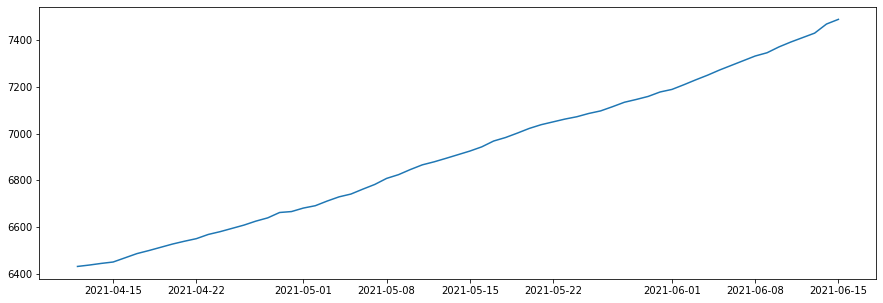

In [18]:
plt.figure(figsize = (15, 5))
plt.plot("Date", "Total Deaths", data = pd.concat([before_ied, after_ied]));

Dapat dilihat total angka kematian semakin naik, dan hipotesis tingkat kematian setelah event lebaran angkanya melonjak.

Melakukan T Test total kematian di event before dan after lebaran.

In [19]:
t, p = stats.ttest_rel(after_ied["Total Deaths"],before_ied["Total Deaths"])
p1 = p/2
print(f"t-statistic: {t}")
print(f"t-statistic-pvalue: {p1}")

t-statistic: 141.3452277284443
t-statistic-pvalue: 1.9906607242732426e-45


In [20]:
pop = np.random.normal(before_ied["Total Deaths"].mean(), before_ied["Total Deaths"].std(), 100000)

ci = stats.norm.interval(0.90, before_ied["Total Deaths"].mean(), before_ied["Total Deaths"].std())

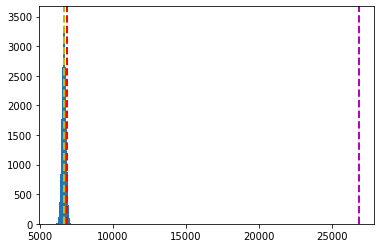

In [21]:
plt.hist(pop, bins = 100)
plt.axvline(pop.mean(), color = "y", linestyle = "--", linewidth = 2)
plt.axvline(ci[1], color = "r", linestyle = "--", linewidth = 2)
plt.axvline(pop.mean() + t*pop.std(), color = "m", linestyle = "--", linewidth = 2)
plt.show()

In [22]:
if p1 <= 0.05:
  print("H0 Diterima")
elif p1 > 0.05:
  print("H0 & Tidak Dapat menerima H1")

H0 Diterima


In [23]:
print("Before ied Total Deaths mean: {}".format(round(before_ied["Total Deaths"].mean(), 3)))
print("After ied Total Deaths mean: {}".format(round(after_ied["Total Deaths"].mean(), 3)))

Before ied Total Deaths mean: 6640.625
After ied Total Deaths mean: 7186.688


Kesimpulan, Hasil akhir dari Hipotesis testing kali ini, hipotesa yang saya berikan adalah tingkat kematian sebelum event lebaran memiliki rata-rata kematian 6640.625. Untuk event pasca lebaran memiliki rata-rata 7186.688 total angka kematian. ini menunjukkan ada peningkatan angka kematian setelah lebaran yang mungkin salah satu penyebabnya adalah event mudik, karena banyak orang-orang yang berpergian keluar, menambah pesebaran virus corona dan bertemu kerabat jauh. Tindakan seperti ini dapat memicu penularan dan pesebaran virus hingga menyebabkan peningkatan angka kematian.